# Develop a neural network that recognizes handwritting numbers

# Loading MNIST 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
pd.Series(y_train).unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

## Viewing data

C:\Users\DELL\AppData\Local\Temp\ipykernel_11740\3405860901.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(330 + 1 + i)


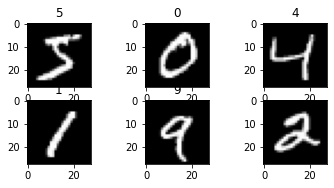

In [5]:
for i in range(6):  
    plt.title(y_train[i-1])
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)


In [8]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

## Model creation

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [10]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 792s 468ms/step - loss: 0.2703 - accuracy: 0.9193 - val_loss: 0.0733 - val_accuracy: 0.9812
Epoch 2/10
1688/1688 [==============================] - 797s 472ms/step - loss: 0.1141 - accuracy: 0.9669 - val_loss: 0.0593 - val_accuracy: 0.9858
Epoch 3/10
1688/1688 [==============================] - 719s 426ms/step - loss: 0.0907 - accuracy: 0.9731 - val_loss: 0.0935 - val_accuracy: 0.9832
Epoch 4/10
1688/1688 [==============================] - 664s 393ms/step - loss: 0.0748 - accuracy: 0.9783 - val_loss: 0.0873 - val_accuracy: 0.9828
Epoch 5/10
1688/1688 [==============================] - 659s 390ms/step - loss: 0.0655 - accuracy: 0.9808 - val_loss: 0.1078 - val_accuracy: 0.9803
Epoch 6/10
1688/1688 [==============================] - 653s 387ms/step - loss: 0.0589 - accuracy: 0.9830 - val_loss: 0.1550 - val_accuracy: 0.9747
Epoch 7/10
1688/1688 [==============================] - 654s 388ms/step - loss: 0.0553 - accuracy: 0.9836 - val_

## Saving model

In [13]:
pickle.dump(model, open('model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\dropout_3
......vars
...layers\dropout_4
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........

## Loading model 

In [14]:
model=pickle.load(open('model.pkl','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-17 01:45:34         5852
metadata.json                                  2023-01-17 01:45:34           64
variables.h5                                   2023-01-17 01:45:34      7152712
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dr

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [16]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 21s 65ms/step - loss: 4.1226 - accuracy: 0.9849
Test Loss 4.1226019859313965
Test Accuracy 0.9848999977111816


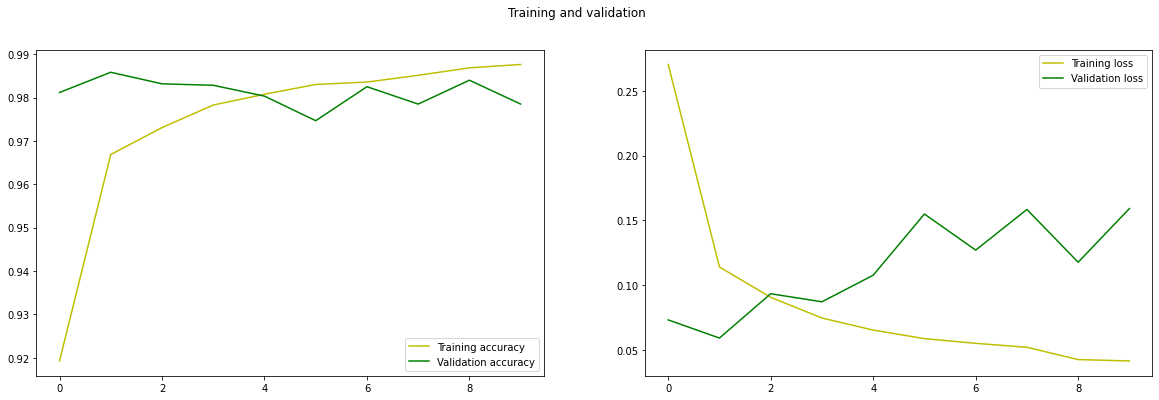

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

## Viewing confusion matrix

In [17]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 29s 92ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1130,    2,    0,    2,    0,    0,    0,    1,    0],
       [   2,    1, 1016,    0,    6,    0,    1,    6,    0,    0],
       [   0,    0,    5, 1001,    0,    1,    0,    0,    2,    1],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   1,    0,    0,   14,    0,  865,    6,    0,    3,    3],
       [   6,    1,    0,    0,    5,    1,  941,    0,    4,    0],
       [   0,    0,    2,    1,    3,    0,    0, 1021,    1,    0],
       [   6,    0,    2,    0,    4,    0,    0,    2,  957,    3],
       [   0,    0,    0,    0,   36,    2,    0,    5,    9,  957]])>

## Testing

313/313 [==============================] - 19s 60ms/step
Predicted Value:  1
Successful prediction


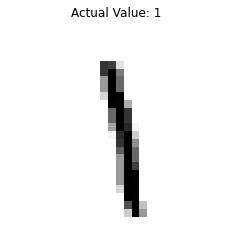

In [18]:
m=np.random.randint(100)
plt.imshow(x_test[m],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[m]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[m]))
if(y_test[m]==(np.argmax(prediction[m]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')